In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix



In [10]:
model = tf.keras.models.load_model(r"/home/gokul/Projects/Face-Emotion-Recognition-CNN/artifacts/face_emotion_model.h5")

In [11]:
train_dir = r"/home/gokul/Projects/Face-Emotion-Recognition-CNN/data/train"

In [12]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=32,     # ✅ safe batch size
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [13]:
val_generator = val_gen

In [14]:
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

/home/gokul/ml/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-09-21 16:16:24.887578: I external/local_xla/xla/service/service.cc:163] XLA service 0x72769800bc60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-21 16:16:24.887660: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-09-21 16:16:24.992508: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-21 16:16:25.232422: I external/local_xla/xla/stream_executor/cuda/cuda_dnn

  4/180 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step

I0000 00:00:1758471389.447557   38785 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step


In [15]:
print("\nClassification Report:\n")
print(classification_report(val_generator.classes, y_pred, target_names=list(val_generator.class_indices.keys())))


Classification Report:

              precision    recall  f1-score   support

       angry       0.43      0.33      0.37       799
     disgust       0.17      0.77      0.28        87
        fear       0.38      0.16      0.22       819
       happy       0.83      0.77      0.80      1443
     neutral       0.48      0.57      0.52       993
         sad       0.41      0.47      0.44       966
    surprise       0.63      0.76      0.69       634

    accuracy                           0.54      5741
   macro avg       0.48      0.55      0.47      5741
weighted avg       0.55      0.54      0.53      5741



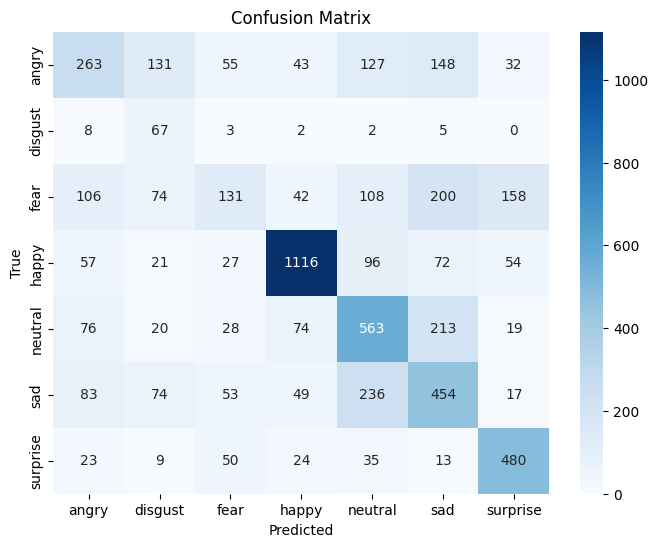

In [16]:
cm = confusion_matrix(val_generator.classes, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [17]:
loss, acc = model.evaluate(val_generator, verbose=0)
print(f"\n✅ Model Accuracy on Validation Set: {acc*100:.2f}%")


✅ Model Accuracy on Validation Set: 54.21%
